**Data Analysis with Python**

In [ ]:
# Display the data types of each column using the attribute dtypes, then take a screenshot and submit it. Include your code in the image.

import pandas as pd

df = pd.read_csv('kc_house_data.csv')

print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot and submit it.

import pandas as pd

df = pd.read_csv('kc_house_data.csv')

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

summary = df.describe()

print(summary)


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [ ]:
# Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame. Take a screenshot of your code and output and submit it.

import pandas as pd

df = pd.read_csv('kc_house_data.csv')

floors_count = df['floors'].value_counts()

floors_count_df = floors_count.to_frame()

print(floors_count_df)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


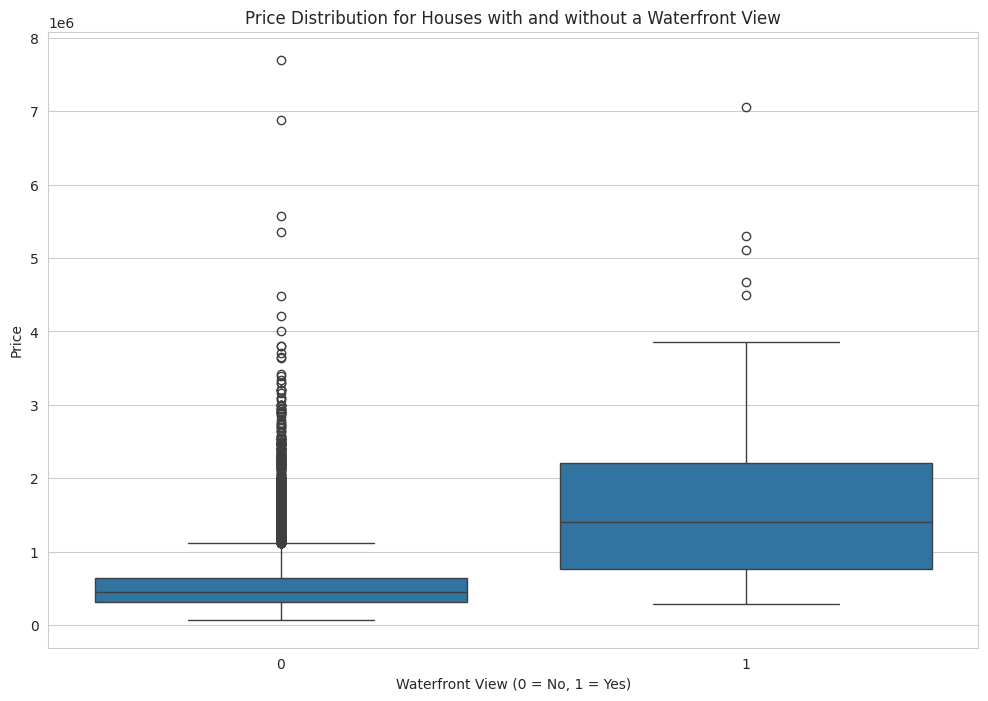

In [ ]:
# Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot and submit it.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='waterfront', y='price', data=df)

plt.title('Price Distribution for Houses with and without a Waterfront View')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price')

plt.show()


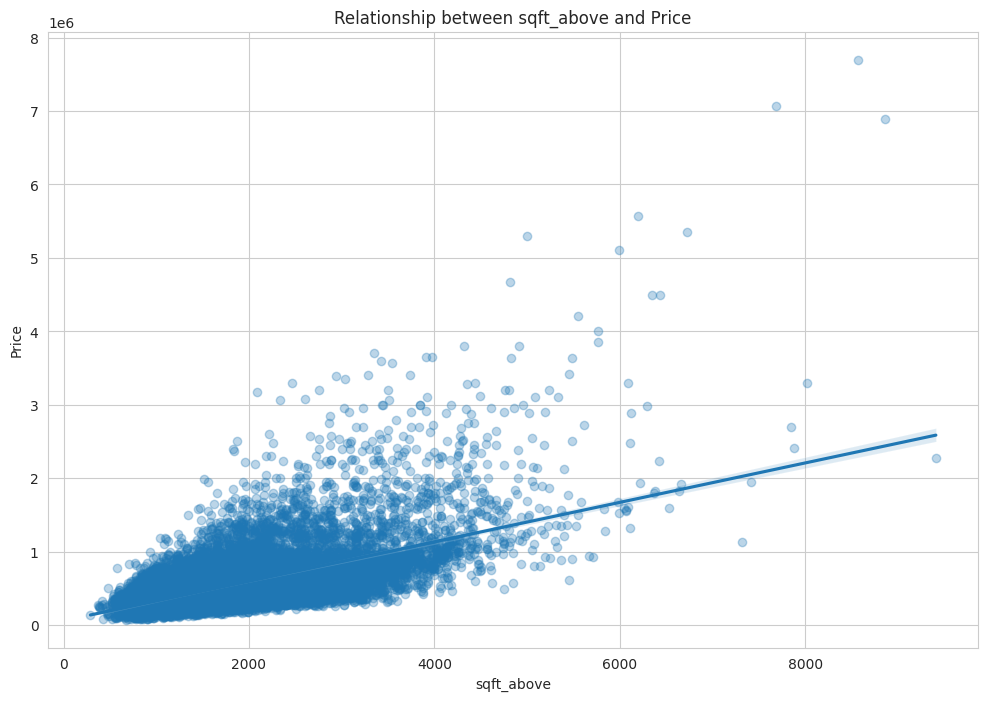

In [ ]:
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it. Submit your screenshot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={"alpha": 0.3})

plt.title('Relationship between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')

plt.show()


In [11]:
#Fit a linear regression model to predict the 'price' using the list of features:

#"floors"
#"waterfront"
#"lat"
#"bedrooms"
#"sqft_basement"
#"view"
#"bathrooms"
#"sqft_living15"
#"sqft_above"
#"grade"
#"sqft_living"

#Take a screenshot of your code and R^2 value and upload it.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your dataset
# df = pd.read_csv('path/to/your/dataset.csv')

# Assuming 'df' is your DataFrame with the required columns
# Selecting features and target variable
X = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view',
        'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the R^2 value
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')


R^2 value: 0.6614781405487731


In [ ]:
#Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2. Take a screenshot of your code and the value of the R^2. Submit the screenshot.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

X = df[['sqft_living']]  # Features
y = df['price']          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print('R^2:', r_squared)


R^2: 0.49406905389089006


In [ ]:
#Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2 and upload it.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

X = df[['sqft_living']]  # Feature
y = df['price']          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_transform', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print('R^2:', r_squared)


R^2: 0.45683478653690757


In [ ]:
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the R^2 and upload it.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

X = df[['sqft_living']]  # Feature
y = df['price']          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_reg = Ridge(alpha=0.1)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print('R^2:', r_squared)


R^2: 0.4940690538907725


In [ ]:
# Perform a second-order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided. Take a screenshot of your code and the R^2 and upload it.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

df = pd.read_csv('kc_house_data.csv')

X = df[['sqft_living']]  # Feature
y = df['price']          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_reg = Ridge(alpha=0.1)

ridge_reg.fit(X_train_poly, y_train)

y_pred = ridge_reg.predict(X_test_poly)

r_squared = r2_score(y_test, y_pred)

print('R^2:', r_squared)


R^2: 0.45683478653671405


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.15512e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
